In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/PGM MINIPROJECT/diabetes.csv')

**A brief description about the dataset**
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# getting mean and variance for each column
columns = list(df.columns[:-1])
d = {}
for i in columns:
  d[i] = [stats.mean(df[i]),stats.variance(df[i])]
print(d)

{'Pregnancies': [3.8450520833333335, 11.354056320621469], 'Glucose': [120.89453125, 1022.2483142519557], 'BloodPressure': [69.10546875, 374.6472712271838], 'SkinThickness': [20.536458333333332, 254.47324532811822], 'Insulin': [79.79947916666667, 13281.180077955236], 'BMI': [31.992578125, 62.15998395738266], 'DiabetesPedigreeFunction': [0.4718763020833333, 0.10977863787313939], 'Age': [33.240885416666664, 138.30304589037374]}


In [ ]:
cor = df.corr()

In [ ]:
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


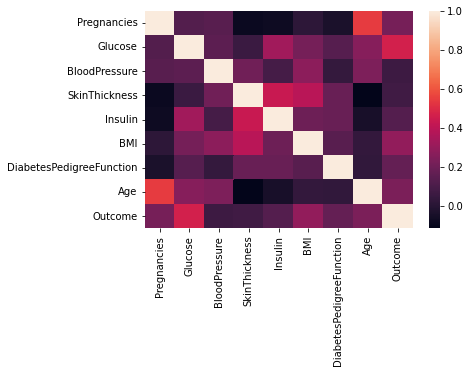

In [ ]:
sns.heatmap(df.corr())

In [ ]:
cor['Pregnancies']

Pregnancies                 1.000000
Glucose                     0.129459
BloodPressure               0.141282
SkinThickness              -0.081672
Insulin                    -0.073535
BMI                         0.017683
DiabetesPedigreeFunction   -0.033523
Age                         0.544341
Outcome                     0.221898
Name: Pregnancies, dtype: float64

In [ ]:
max_cor = {}
for i in cor:
  max = 0
  for j in cor[i]:
    if(j!=1.000000 and j>max):
      max = j
      max_cor[i] = max
max_cor

{'Pregnancies': 0.5443412284023392,
 'Glucose': 0.46658139830687373,
 'BloodPressure': 0.2818052888499109,
 'SkinThickness': 0.43678257012001326,
 'Insulin': 0.43678257012001326,
 'BMI': 0.39257320415903835,
 'DiabetesPedigreeFunction': 0.1850709291680993,
 'Age': 0.5443412284023392,
 'Outcome': 0.46658139830687373}

**Pre-Processing the data to fit our needs**

* In order to be able to properly use our data , we need to convert some discrete features to categorical features so that we can have fixed number of categories for that column which would be easier for classification .
* So we define a preprocessor function to be applied on different columns .

In [ ]:
def preprocessor(atr):
  m = 0
  for i in atr:
    m = df[i].median()
    df[i] = [1 if x>m else 0 for x in df[i]]

In [ ]:
def preprocessor_2(atr, a, b):
  df[atr] = [0 if x<a else 1 if a<=x<b else 2 for x in df[atr]]

In [ ]:
a = ['BMI','Insulin','BloodPressure', "DiabetesPedigreeFunction"]
b = ['Age', 'Glucose', 'SkinThickness', "Pregnancies"]

In [ ]:
preprocessor_2("Age", 27, 40)
preprocessor_2("Glucose", 100, 125)
preprocessor_2("SkinThickness", 15, 30)
preprocessor_2("Pregnancies", 2, 5)

In [ ]:
preprocessor(a)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,2,0,2,0,1,1,2,1
1,0,0,0,1,0,0,0,1,0
2,2,2,0,0,0,0,1,1,1
3,0,0,0,1,1,0,0,0,0
4,0,2,0,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
763,2,1,1,2,1,1,0,2,0
764,1,1,0,1,0,1,0,1,0
765,2,1,0,1,1,0,0,1,0
766,0,2,0,0,0,0,0,2,1


###Train_Test_Split

Function to get probability of independent nodes

In [ ]:
d = {}
def get_prob(atr):
  l = len(df)
  uniq = sorted(df[atr].unique())
  p = [round(len(df[df[atr] == x])/l, 4) for x in uniq]
  d[atr] = p

In [ ]:
cols = df.columns
for i in cols:
  get_prob(i)
print(d)

{'Pregnancies': [0.3203, 0.3203, 0.3594], 'Glucose': [0.2565, 0.3385, 0.4049], 'BloodPressure': [0.5456, 0.4544], 'SkinThickness': [0.3464, 0.3086, 0.3451], 'Insulin': [0.5, 0.5], 'BMI': [0.5026, 0.4974], 'DiabetesPedigreeFunction': [0.5, 0.5], 'Age': [0.3906, 0.3398, 0.2695], 'Outcome': [0.651, 0.349]}


Functions to get probabilty of a node having one dependency

In [ ]:
def dep_prob(atr, dep):
  l = len(df)
  u1 = sorted(df[atr].unique())
  u2 = sorted(df[dep].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      a.append(round(len(df[(df[atr] == i) & (df[dep] == j)])/len(df[df[dep] == j]), 4))
    p.append(a)
  return p

# dep_prob("SkinThickness", "Age")

Functions to get probabilty of a node having two dependency

In [ ]:
def dep_prob2(atr, dep1, dep2):
  u1 = sorted(df[atr].unique())
  u2 = sorted(df[dep1].unique())
  u3 = sorted(df[dep2].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      for k in u3:
        a.append(round(len(df[(df[atr] == i) & (df[dep1] == j) & (df[dep2] == k)])/len(df[(df[dep1] == j) & (df[dep2] == k)]), 4))
    p.append(a)
  return p

# dep_prob2('Insulin', 'Age', 'DiabetesPedigreeFunction')

Functions to get probabilty of a node having four dependency

In [ ]:
def dep_prob4(atr, dep1, dep2, dep3, dep4):
  u1 = sorted(df[atr].unique())
  u2 = sorted(df[dep1].unique())
  u3 = sorted(df[dep2].unique())
  u4 = sorted(df[dep3].unique())
  u5 = sorted(df[dep4].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      for k in u3:
        for l in u4:
          for m in u5:
            a.append(round(len(df[(df[atr] == i) & (df[dep1] == j) & (df[dep2] == k) & (df[dep3] == l) & (df[dep4] == m)])/len(df[(df[dep1] == j) & (df[dep2] == k) & (df[dep3] == l) & (df[dep4] == m)]), 4))
    p.append(a)
  return p

# dep_prob4('BloodPressure', 'BMI', 'Insulin', 'Glucose', 'Outcome')

**Deriving relationships in the dataset**

**Relationships in the dataset**

* In order to create a Probablistic Graphical Model representing this dataset , we first need to find the relationships in the dataset and the flow of influence that is essential in perspective of the PGM.
* After properly understanding the rrelationshis in the dataset , we need to select a representation that best fits the specified dataset and captures the relationships.

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

diabetes_model = BayesianNetwork([('Age', 'SkinThickness'), ('Age', 'Pregnancies'), ('Age', 'Insulin'), ('SkinThickness', 'BMI'), ('BMI', 'BloodPressure'), ('DiabetesPedigreeFunction', 'Insulin'), ('Insulin', 'Glucose'), ('Insulin', 'BloodPressure'), ('Glucose', 'Outcome'), ('Glucose', 'BloodPressure'), ('Outcome', 'BloodPressure')])
cpd_Age = TabularCPD('Age', 3, [[d['Age'][0]], [d['Age'][1]], [d['Age'][2]]])
cpd_PedFunc = TabularCPD('DiabetesPedigreeFunction', 2, [[d['DiabetesPedigreeFunction'][0]], [d['DiabetesPedigreeFunction'][1]]])
cpd_SkinThick = TabularCPD('SkinThickness', 3, dep_prob('SkinThickness', 'Age'), ['Age'], [3])
cpd_Pregnancies = TabularCPD('Pregnancies', 3, dep_prob('Pregnancies', 'Age'), ['Age'], [3])
cpd_BMI = TabularCPD('BMI', 2, dep_prob('BMI', 'SkinThickness'), ['SkinThickness'], [3])
cpd_Glucose = TabularCPD('Glucose', 3, dep_prob('Glucose', 'Insulin'), ['Insulin'], [2])
cpd_Diabetes = TabularCPD('Outcome', 2, dep_prob('Outcome', 'Glucose'), ['Glucose'], [3])
cpd_Insulin = TabularCPD('Insulin', 2, dep_prob2('Insulin', 'Age', 'DiabetesPedigreeFunction'), ['Age', 'DiabetesPedigreeFunction'], [3, 2])
cpd_BloodP = TabularCPD('BloodPressure', 2, dep_prob4('BloodPressure', 'BMI', 'Insulin', 'Glucose', 'Outcome'), ['BMI', 'Insulin', 'Glucose', 'Outcome'], [2, 2, 3, 2])

In [ ]:
diabetes_model.add_cpds(cpd_Age, cpd_PedFunc, cpd_SkinThick, cpd_Pregnancies, cpd_BMI, cpd_Glucose, cpd_Diabetes, cpd_Insulin, cpd_BloodP)

In [ ]:
diabetes_model.check_model()

True

In [ ]:
diabetes_model.edges()

OutEdgeView([('Age', 'SkinThickness'), ('Age', 'Pregnancies'), ('Age', 'Insulin'), ('SkinThickness', 'BMI'), ('Insulin', 'Glucose'), ('Insulin', 'BloodPressure'), ('BMI', 'BloodPressure'), ('DiabetesPedigreeFunction', 'Insulin'), ('Glucose', 'Outcome'), ('Glucose', 'BloodPressure'), ('Outcome', 'BloodPressure')])

In [ ]:
for i in diabetes_model.get_cpds():
  print(i)

+--------+--------+
| Age(0) | 0.3906 |
+--------+--------+
| Age(1) | 0.3398 |
+--------+--------+
| Age(2) | 0.2695 |
+--------+--------+
+-----------------------------+-----+
| DiabetesPedigreeFunction(0) | 0.5 |
+-----------------------------+-----+
| DiabetesPedigreeFunction(1) | 0.5 |
+-----------------------------+-----+
+------------------+--------+--------+--------+
| Age              | Age(0) | Age(1) | Age(2) |
+------------------+--------+--------+--------+
| SkinThickness(0) | 0.2667 | 0.3716 | 0.43   |
+------------------+--------+--------+--------+
| SkinThickness(1) | 0.4133 | 0.2337 | 0.2512 |
+------------------+--------+--------+--------+
| SkinThickness(2) | 0.32   | 0.3946 | 0.3188 |
+------------------+--------+--------+--------+
+----------------+--------+--------+--------+
| Age            | Age(0) | Age(1) | Age(2) |
+----------------+--------+--------+--------+
| Pregnancies(0) | 0.5433 | 0.2184 | 0.1256 |
+----------------+--------+--------+--------+
| Pregna

In [ ]:
print(cpd_Age)

+--------+--------+
| Age(0) | 0.3906 |
+--------+--------+
| Age(1) | 0.3398 |
+--------+--------+
| Age(2) | 0.2695 |
+--------+--------+


In [ ]:
print(cpd_Diabetes)

+------------+------------+------------+------------+
| Glucose    | Glucose(0) | Glucose(1) | Glucose(2) |
+------------+------------+------------+------------+
| Outcome(0) | 0.9188     | 0.7346     | 0.4116     |
+------------+------------+------------+------------+
| Outcome(1) | 0.0812     | 0.2654     | 0.5884     |
+------------+------------+------------+------------+


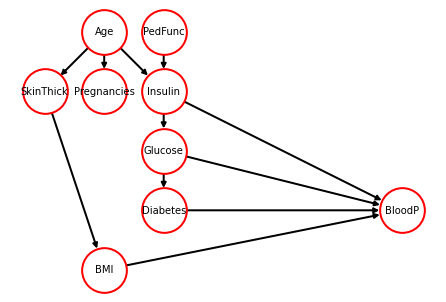

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
edges = [('Age', 'SkinThick'), ('Age', 'Pregnancies'), ('Age', 'Insulin'), ('SkinThick', 'BMI'), ('BMI', 'BloodP'), ('PedFunc', 'Insulin'), ('Insulin', 'Glucose'), ('Insulin', 'BloodP'), ('Glucose', 'Diabetes'), ('Glucose', 'BloodP'), ('Diabetes', 'BloodP')]
g = nx.DiGraph()
for i in edges:
  g.add_edge(i[0], i[1])

pos = {'Insulin': (0,0), 'Glucose':(0,-1), 'Diabetes':(0,-2), 'BloodP':(4,-2), 'PedFunc':(0,1), 'Age':(-1,1), 'Pregnancies':(-1,0), 'SkinThick':(-2,0), 'BMI':(-1,-3)}

options = {
    "font_size": 10,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "red",
    "linewidths": 2,
    "width": 2,
}

nx.draw(g, **options, with_labels = True, pos=pos)

In [ ]:
nodes = list(g.nodes)
nodes.remove('Diabetes')
nodes

['Age',
 'SkinThick',
 'Pregnancies',
 'Insulin',
 'BMI',
 'BloodP',
 'PedFunc',
 'Glucose']

Does multiple pregnancy cause diabetes?
Women carrying multiples have a high risk of gestational diabetes. This condition can increase the risk of preeclampsia and of developing diabetes mellitus later in life. Newborns may have breathing problems or low blood sugar levels.

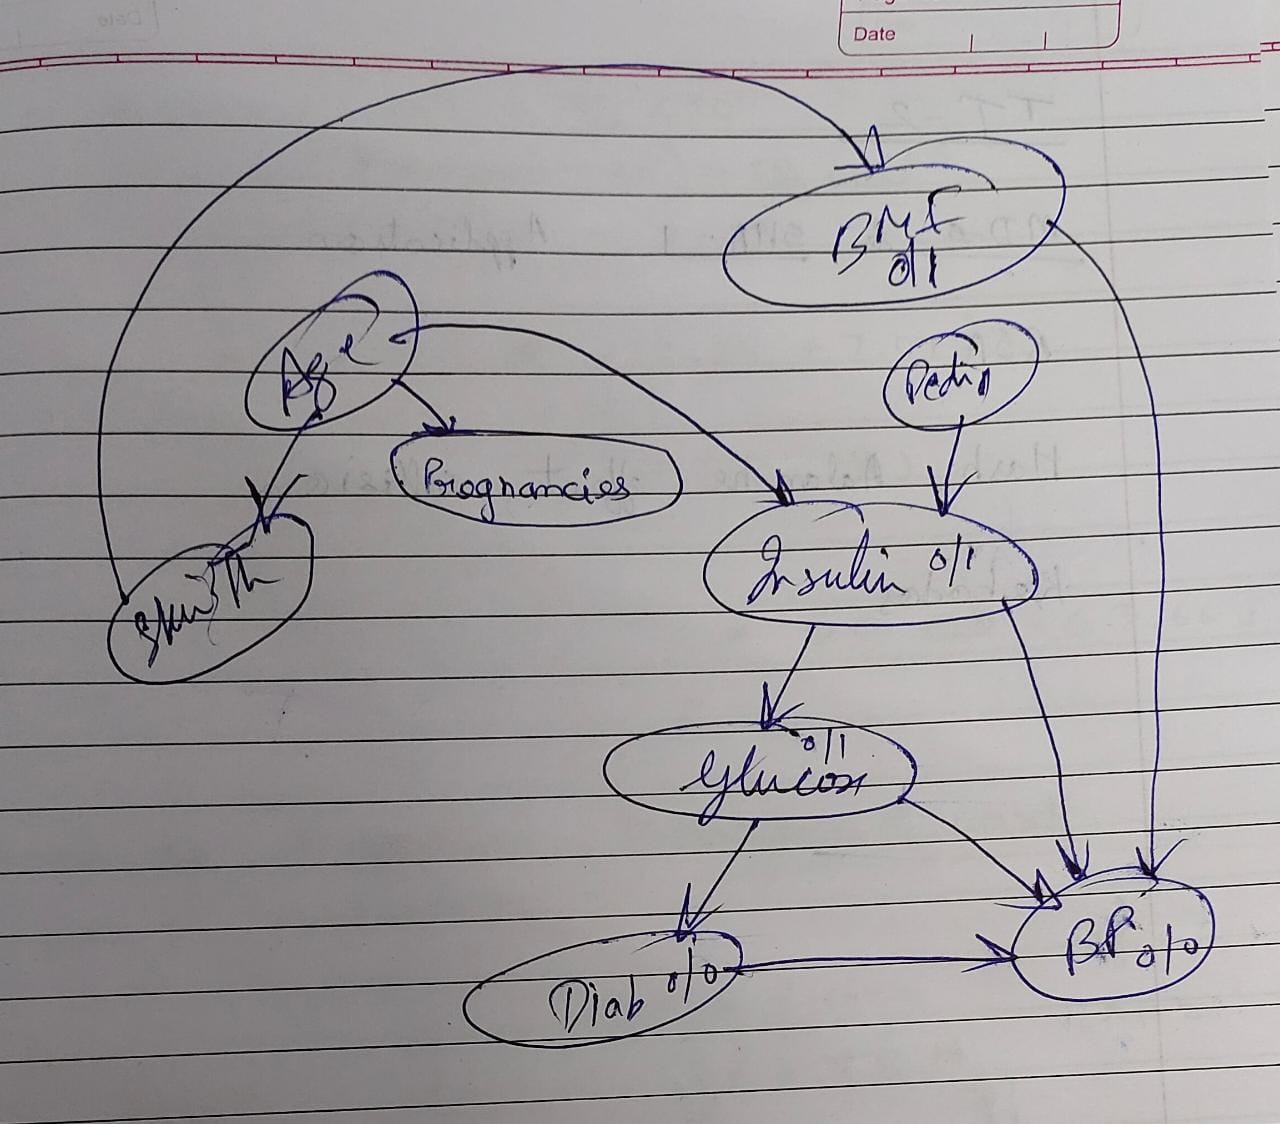

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
train_data = df[:400]
predict_data = df[400:]
diabetes_model.fit(df)
predict_data = predict_data.copy()
predict_data.drop('Outcome', axis=1, inplace=True)
y_prob = diabetes_model.predict_probability(predict_data)

In [ ]:
y_prob

,Outcome_0,Outcome_1
400,0.932142,0.067858
401,0.330931,0.669069
402,0.447316,0.552684
403,0.866029,0.133971
404,0.308063,0.691937
...,...,...
763,0.695087,0.304913
764,0.697880,0.302120
765,0.841286,0.158714
766,0.330931,0.669069


In [ ]:
Class_pred=[1 if y_prob['Outcome_0'][i]<0.5 else 0 for i in range(400,768)]

In [ ]:
def acc(Class_pred,Trueclass):
  n=len(Trueclass)
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(Trueclass)):
    if Class_pred[i]==Trueclass[i]:
      if Class_pred[i] == 1:
        tp+=1
      else:
        tn+=1
    else:
      if(Trueclass[i] == 0):
        fp+=1
      else:
        fn+=1

  precision = (tp/(tp+fp))
  recall = (tp/(tp+fn))
  output=[]
  print(f"The accuracy is {((tp+tn)/n)*100}")
  output.append(((tp+tn)/n)*100)
  print(f"The precision is {precision}")
  output.append(precision)
  print(f"The recall is {recall}")
  output.append(recall)
  print(f"The f1-score is {2*(precision*recall)/(precision+recall)}")
  output.append(2*(precision*recall)/(precision+recall))
  return output

In [ ]:
dfn=df[400:]
dfn.reset_index(inplace=True)

In [ ]:
print(len(Class_pred))
print(len(dfn))

368
368


In [ ]:
output_bayesian=acc(Class_pred,dfn["Outcome"])

The accuracy is 74.72826086956522
The precision is 0.5793103448275863
The recall is 0.7241379310344828
The f1-score is 0.6436781609195402


##INFERENCE IN BAYESIAN NETWORK

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(diabetes_model)
g_dist = infer.query(['Age'])
print(g_dist)

+--------+------------+
| Age    |   phi(Age) |
+========+============+
| Age(0) |     0.3906 |
+--------+------------+
| Age(1) |     0.3398 |
+--------+------------+
| Age(2) |     0.2695 |
+--------+------------+


In [ ]:
print(infer.query(['Outcome'], evidence={'Age':0, 'BloodPressure': 0 }))

+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.6861 |
+------------+----------------+
| Outcome(1) |         0.3139 |
+------------+----------------+


In [ ]:
print(infer.query(['Outcome'], evidence={'Insulin': 0 , 'Glucose': 2}))

+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.4116 |
+------------+----------------+
| Outcome(1) |         0.5884 |
+------------+----------------+


##NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=df.copy()
X=data.drop('Outcome',axis=1)
Y=data[['Outcome']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,train_size=0.8)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred))
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test, Y_pred)

Accuracy:  0.7272727272727273


In [ ]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('F1 score:', f1_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('\n clasification report:\n', classification_report(Y_test,Y_pred))
print('\n confussion matrix:\n',confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7272727272727273
F1 score: 0.625
Recall: 0.6363636363636364
Precision: 0.6140350877192983

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


 confussion matrix:
 [[77 22]
 [20 35]]


In [ ]:
output_NB = [(accuracy_score(Y_test, Y_pred))*100,precision_score(Y_test, Y_pred),recall_score(Y_test, Y_pred),f1_score(Y_test, Y_pred)]

##Chow-Liu

In [ ]:
from pgmpy.sampling import BayesianModelSampling

# sample data from BN
inference = BayesianModelSampling(diabetes_model)
df_data = inference.forward_sample(size=10000)
df_data

  0%|          | 0/9 [00:00<?, ?it/s]

,Age,SkinThickness,Pregnancies,Insulin,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Outcome
0,1,2,1,0,1,0,1,2,0
1,0,0,0,1,1,1,1,2,1
2,2,1,0,0,1,1,1,1,0
3,0,1,0,0,0,0,1,2,1
4,2,0,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...
9995,1,2,2,0,1,1,1,0,0
9996,1,0,2,0,0,0,0,0,0
9997,1,0,1,0,0,0,0,0,0
9998,0,1,1,0,0,1,1,1,1


##Age as root

Building tree:   0%|          | 0/36.0 [00:00<?, ?it/s]

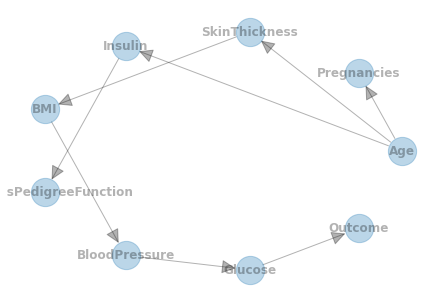

In [ ]:
from pgmpy.estimators import TreeSearch
est = TreeSearch(df_data, root_node="Age")
dag = est.estimate(estimator_type="chow-liu")
nx.draw_circular(dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold")
plt.show()

In [ ]:
from pgmpy.estimators import BayesianEstimator
model1 = BayesianNetwork(dag.edges())
model1.fit(df_data, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1)
model1.get_cpds()

[<TabularCPD representing P(Age:3) at 0x7f667c1806a0>,
 <TabularCPD representing P(Pregnancies:3 | Age:3) at 0x7f667c180b80>,
 <TabularCPD representing P(SkinThickness:3 | Age:3) at 0x7f667c1258e0>,
 <TabularCPD representing P(Insulin:2 | Age:3) at 0x7f667c180b20>,
 <TabularCPD representing P(BMI:2 | SkinThickness:3) at 0x7f667c121610>,
 <TabularCPD representing P(DiabetesPedigreeFunction:2 | Insulin:2) at 0x7f667c10bfd0>,
 <TabularCPD representing P(BloodPressure:2 | BMI:2) at 0x7f667c110be0>,
 <TabularCPD representing P(Glucose:3 | BloodPressure:2) at 0x7f667c110b80>,
 <TabularCPD representing P(Outcome:2 | Glucose:3) at 0x7f667c180700>]

In [ ]:
print(model1.get_cpds()[0])

+--------+----------+
| Age(0) | 0.394398 |
+--------+----------+
| Age(1) | 0.3356   |
+--------+----------+
| Age(2) | 0.270002 |
+--------+----------+


In [ ]:
for i in model1.get_cpds():
  print(i)

+--------+----------+
| Age(0) | 0.394398 |
+--------+----------+
| Age(1) | 0.3356   |
+--------+----------+
| Age(2) | 0.270002 |
+--------+----------+
+----------------+-----+---------------------+
| Age            | ... | Age(2)              |
+----------------+-----+---------------------+
| Pregnancies(0) | ... | 0.11706106728881976 |
+----------------+-----+---------------------+
| Pregnancies(1) | ... | 0.11520942117542496 |
+----------------+-----+---------------------+
| Pregnancies(2) | ... | 0.7677295115357552  |
+----------------+-----+---------------------+
+------------------+-----+---------------------+
| Age              | ... | Age(2)              |
+------------------+-----+---------------------+
| SkinThickness(0) | ... | 0.4536903307039959  |
+------------------+-----+---------------------+
| SkinThickness(1) | ... | 0.22704884642447137 |
+------------------+-----+---------------------+
| SkinThickness(2) | ... | 0.31926082287153285 |
+------------------+-----+-----

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
train_data = df_data[:8000]
predict_data = df_data[8000:]
model1.fit(df_data)
predict_data = predict_data.copy()
predict_data.drop('Outcome', axis=1, inplace=True)
y_prob = model1.predict_probability(predict_data)

In [ ]:
y_prob

,Outcome_0,Outcome_1
8000,0.917031,0.082969
8001,0.740376,0.259624
8002,0.412833,0.587167
8003,0.917031,0.082969
8004,0.412833,0.587167
...,...,...
9995,0.917031,0.082969
9996,0.917031,0.082969
9997,0.917031,0.082969
9998,0.740376,0.259624


In [ ]:
Class_pred=[1 if y_prob['Outcome_0'][i]<0.5 else 0 for i in range(8000,10000)]

In [ ]:
def acc(Class_pred,Trueclass):
  n=len(Trueclass)
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(Trueclass)):
    if Class_pred[i]==Trueclass[i]:
      if Class_pred[i] == 1:
        tp+=1
      else:
        tn+=1
    else:
      if(Trueclass[i] == 0):
        fp+=1
      else:
        fn+=1

  precision = (tp/(tp+fp))
  recall = (tp/(tp+fn))
  output=[]
  print(f"The accuracy is {((tp+tn)/n)*100}")
  output.append(((tp+tn)/n)*100)
  print(f"The precision is {precision}")
  output.append(precision)
  print(f"The recall is {recall}")
  output.append(recall)
  print(f"The f1-score is {2*(precision*recall)/(precision+recall)}")
  output.append(2*(precision*recall)/(precision+recall))
  return output

In [ ]:
dfn=df_data[8000:]
dfn.reset_index(inplace=True)

In [ ]:
print(len(Class_pred))
print(len(dfn))

2000
2000


In [ ]:
output_chowliu1=acc(Class_pred,dfn["Outcome"])

The accuracy is 72.75
The precision is 0.5814814814814815
The recall is 0.6957163958641064
The f1-score is 0.6334902488231339


##Ped Function as root

Building tree:   0%|          | 0/36.0 [00:00<?, ?it/s]

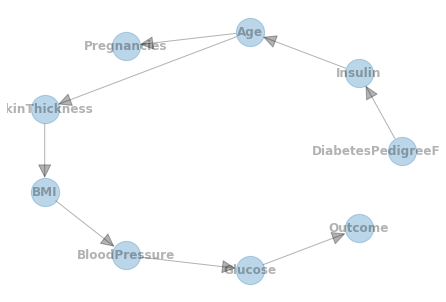

In [ ]:
from pgmpy.estimators import TreeSearch

# learn graph structure
est = TreeSearch(df_data, root_node="DiabetesPedigreeFunction")
dag = est.estimate(estimator_type="chow-liu")
nx.draw_circular(dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight="bold")
plt.show()

In [ ]:
from pgmpy.estimators import BayesianEstimator
model2 = BayesianNetwork(dag.edges())
model2.fit(df_data, estimator=BayesianEstimator, prior_type="dirichlet", pseudo_counts=0.1)
model2.get_cpds()

[<TabularCPD representing P(DiabetesPedigreeFunction:2) at 0x7f667c04f9a0>,
 <TabularCPD representing P(Insulin:2 | DiabetesPedigreeFunction:2) at 0x7f667c0bd910>,
 <TabularCPD representing P(Age:3 | Insulin:2) at 0x7f6700d06b20>,
 <TabularCPD representing P(Pregnancies:3 | Age:3) at 0x7f667c05a880>,
 <TabularCPD representing P(SkinThickness:3 | Age:3) at 0x7f667c048b20>,
 <TabularCPD representing P(BMI:2 | SkinThickness:3) at 0x7f667c0bddf0>,
 <TabularCPD representing P(BloodPressure:2 | BMI:2) at 0x7f667c04f970>,
 <TabularCPD representing P(Glucose:3 | BloodPressure:2) at 0x7f667c0bdb50>,
 <TabularCPD representing P(Outcome:2 | Glucose:3) at 0x7f6684789520>]

In [ ]:
print(model2.get_cpds()[0])

+-----------------------------+-------+
| DiabetesPedigreeFunction(0) | 0.496 |
+-----------------------------+-------+
| DiabetesPedigreeFunction(1) | 0.504 |
+-----------------------------+-------+


In [ ]:
for i in model2.get_cpds():
  print(i)

+-----------------------------+-------+
| DiabetesPedigreeFunction(0) | 0.496 |
+-----------------------------+-------+
| DiabetesPedigreeFunction(1) | 0.504 |
+-----------------------------+-------+
+--------------------------+-----+-----------------------------+
| DiabetesPedigreeFunction | ... | DiabetesPedigreeFunction(1) |
+--------------------------+-----+-----------------------------+
| Insulin(0)               | ... | 0.4230189278203246          |
+--------------------------+-----+-----------------------------+
| Insulin(1)               | ... | 0.5769810721796754          |
+--------------------------+-----+-----------------------------+
+---------+---------------------+---------------------+
| Insulin | Insulin(0)          | Insulin(1)          |
+---------+---------------------+---------------------+
| Age(0)  | 0.3019978843582221  | 0.48716510029457144 |
+---------+---------------------+---------------------+
| Age(1)  | 0.34730455262159954 | 0.32384826563533253 |
+--------

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
train_data = df_data[:8000]
predict_data = df_data[8000:]
model2.fit(df_data)
predict_data = predict_data.copy()
predict_data.drop('Outcome', axis=1, inplace=True)
y_prob = model2.predict_probability(predict_data)

In [ ]:
y_prob

,Outcome_0,Outcome_1
8000,0.917031,0.082969
8001,0.740376,0.259624
8002,0.412833,0.587167
8003,0.917031,0.082969
8004,0.412833,0.587167
...,...,...
9995,0.917031,0.082969
9996,0.917031,0.082969
9997,0.917031,0.082969
9998,0.740376,0.259624


In [ ]:
Class_pred=[1 if y_prob['Outcome_0'][i]<0.5 else 0 for i in range(8000,10000)]

In [ ]:
def acc(Class_pred,Trueclass):
  n=len(Trueclass)
  tp=0
  tn=0
  fp=0
  fn=0
  for i in range(len(Trueclass)):
    if Class_pred[i]==Trueclass[i]:
      if Class_pred[i] == 1:
        tp+=1
      else:
        tn+=1
    else:
      if(Trueclass[i] == 0):
        fp+=1
      else:
        fn+=1

  precision = (tp/(tp+fp))
  recall = (tp/(tp+fn))
  output=[]
  print(f"The accuracy is {((tp+tn)/n)*100}")
  output.append(((tp+tn)/n)*100)
  print(f"The precision is {precision}")
  output.append(precision)
  print(f"The recall is {recall}")
  output.append(recall)
  print(f"The f1-score is {2*(precision*recall)/(precision+recall)}")
  output.append(2*(precision*recall)/(precision+recall))
  return output

In [ ]:
dfn=df_data[8000:]
dfn.reset_index(inplace=True)

In [ ]:
print(len(Class_pred))
print(len(dfn))

2000
2000


In [ ]:
output_chowliu2=acc(Class_pred,dfn["Outcome"])

The accuracy is 72.75
The precision is 0.5814814814814815
The recall is 0.6957163958641064
The f1-score is 0.6334902488231339


##Comparision of Output

In [ ]:
columns=["Accuracy","Presision","Recall","F1-Score"]
models=[output_bayesian,output_chowliu1, output_NB]
index=["Bayesian","Chow-Liu","NaiveBayes"]
comp_matrix = pd.DataFrame(models,columns=columns,index=index)
comp_matrix

,Accuracy,Presision,Recall,F1-Score
Bayesian,74.728261,0.579310,0.724138,0.643678
Chow-Liu,72.750000,0.581481,0.695716,0.633490
NaiveBayes,72.727273,0.614035,0.636364,0.625000
